# Estimación de Parámetros en el Modelo Depredador-Presa
Guido Salazar

Este cuaderno muestra cómo ajustar los parámetros de un modelo de Lotka-Volterra (depredador-presa) a un conjunto de datos reales utilizando Python, así como las bibliotecas `scipy` y `matplotlib`. El ejercicio esta basado en los datos del articulo de Gómez y Vélez "Parameter estimation of a predator-prey model using a genetic algorithm"

### Modelo de Lotka-Volterra
Las ecuaciones diferenciales que describen el sistema depredador-presa son las siguientes:

$$
\dot{x} = \alpha x - \beta x y \\
\dot{y} = \delta x y - \gamma y
$$

Donde:
- \(x\) es la población de presas.
- \(y\) es la población de depredadores.
- $\alpha, \beta, \delta,$ y $\gamma$ son los parámetros a estimar.


## Caracterización de los puntos de equilibrio

sea

$$
F(x) = \left\{ \begin{array}{l}
\dot{x} = \alpha x - \beta x y \\
\dot{y} = \delta x y - \gamma y
\end{array}\right.
$$

Primer paso:

$$
F(x*) = 0 \\
\begin{array}{l}
0 = \alpha x - \beta x y \\
0 = \delta x y - \gamma y
\end{array} = \begin{array}{l}
0 = x(α - βy) \\
0 = y(-γ + δx)
\end{array}
$$

Eq 1: $x*e = (0, 0)$

Eq 2: $Si y = \frac{α}{β}$ entonces $\begin{array}{l}
0 = x(α - β\frac{α}{β}) \\
0 = \frac{α}{β}(-γ + δx)
\end{array} = \begin{array}{l}
0 = 0 \\
0 = \frac{α}{β}(-γ + δx)
\end{array}$ Entonces $x = \frac{γ}{δ}$

Segundo paso Jacobiana:

$$
J(x) = \begin{pmatrix}
α-βy & -βx \\
δy & -γ+δx
\end{pmatrix}
$$

tercer paso hallar autovalores de todos los x* $det(J(x*) - λI) = 0$

1. $X*e = (0, 0)$

$$
det(J(0,0) - λI) = det\left( \begin{pmatrix}
α-λ & 0 \\
0 & -γ-λ
\end{pmatrix}\right)
$$

donde $ λ_1 = α ∧ λ_2 = -γ$. Por casos:

1.   Si $α ∧ γ ∈ R^+$ Como algunos valores propios tienen parte real negativa y otros positivos, entonces es un punto silla.
2.   Si $α ∈ R^+ ∧ γ ∈ R^-$ Como todos los valores propios tienen parte real positivos, entonces es un nodo inestable.
3.   Si $α ∈ R^- ∧ γ ∈ R^+$ Como todos los valores propios tienen parte real neagtiva, entonces es un nodo estable.
4.   Si $α ∧ γ ∈ R^-$ Como algunos valores propios tienen parte real negativa y otros positivos, entonces es un punto silla.

2. $X*e = (\frac{γ}{δ}, \frac{α}{β})$

$$
det\left(J\left(\frac{γ}{δ}, \frac{α}{β}\right) - λI\right) = det\left(
\begin{pmatrix}
α-βD & -βP \\
δD & -γ+δP
\end{pmatrix}
\right)
$$

donde $ λ_1 = α ∧ λ_2 = -γ$. Por casos:

(Falta hacer)


Parámetros ajustados:
alpha = 0.5763, beta = 0.0349, delta = 0.0235, gamma = 0.9070
MSE (Presas): 46.245224263308906
MSE (Depredadores): 163.6380411738648


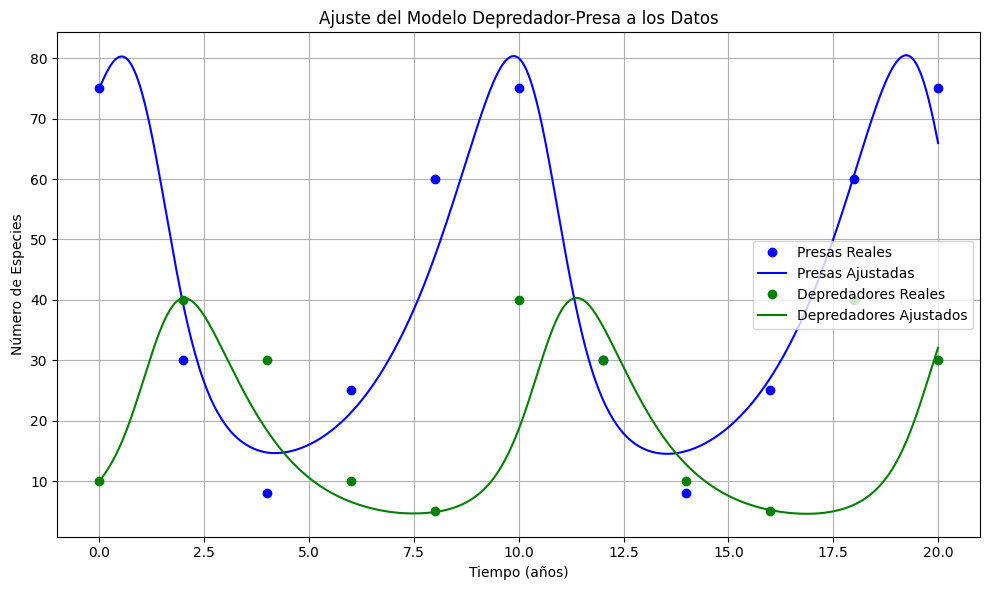

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Datos reales de presas y depredadores (extraídos previamente)
time_years = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
real_presas = np.array([75, 30, 8, 25, 60, 75, 30, 8, 25, 60, 75])
real_dep = np.array([10, 40, 30, 10, 5, 40, 30, 10, 5, 40, 30])

def modelo_lotka_volterra(t, z, alpha, beta, delta, gamma):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

def lotka_volterra(t, alpha, beta, delta, gamma):
    # Resolver las ecuaciones
    sol = solve_ivp(modelo_lotka_volterra, [t[0], t[-1]], [real_presas[0], real_dep[0]], args=(alpha, beta, delta, gamma), t_eval=t,  method=method, dense_output=True)
    return np.concatenate([sol.y[0], sol.y[1]])

# Concatenar los datos reales
datos_concatenados = np.concatenate([real_presas, real_dep])
# Ajustar los parámetros utilizando curve_fit
try:
    popt, pcov = curve_fit(lotka_volterra, time_years, datos_concatenados[:len(time_years) * 2], p0=[0.5, 0.02, 0.01, 0.5])
    alpha_fit, beta_fit, delta_fit, gamma_fit = popt
    print("Parámetros ajustados:")
    print(f"alpha = {alpha_fit:.4f}, beta = {beta_fit:.4f}, delta = {delta_fit:.4f}, gamma = {gamma_fit:.4f}")
except RuntimeError as e:
    print(f"Error durante el ajuste: {e}")

# Generar la gráfica del modelo ajustado
def lotka_volterra_plot(t, alpha, beta, delta, gamma):
    sol = solve_ivp(modelo_lotka_volterra, [t[0], t[-1]], [real_presas[0], real_dep[0]], args=(alpha, beta, delta, gamma), t_eval=t,  method=method, dense_output=True)
    t_new = np.linspace(t[0], t[-1], 1000)
    sol_new = sol.sol(t_new)

    presas_simuladas = sol.y[0]
    depredadores_simulados = sol.y[1]

    # Calcular el error absoluto
    error_abs_presas = np.abs(real_presas - presas_simuladas)
    error_abs_dep = np.abs(real_dep - depredadores_simulados)

    # Calcular el error cuadrático medio (MSE)
    mse_presas = np.mean(error_abs_presas**2)
    mse_dep = np.mean(error_abs_dep**2)

    # Mostrar resultados
    print("MSE (Presas):", mse_presas)
    print("MSE (Depredadores):", mse_dep)

    return t_new, sol_new[0], sol_new[1]
    # return sol.y[0], sol.y[1]

# Soluciones para las presas y depredadores ajustados
t_new, x_fit, y_fit = lotka_volterra_plot(time_years, alpha_fit, beta_fit, delta_fit, gamma_fit)

# Graficar los datos observados y los datos ajustados
plt.figure(figsize=(10, 6))

# Graficar presas
plt.plot(time_years, real_presas, 'bo', label="Presas Reales")
plt.plot(t_new, x_fit, 'b-', label="Presas Ajustadas")

# Graficar depredadores
plt.plot(time_years, real_dep, 'go', label="Depredadores Reales")
plt.plot(t_new, y_fit, 'g-', label="Depredadores Ajustados")

plt.title('Ajuste del Modelo Depredador-Presa a los Datos')
plt.xlabel('Tiempo (años)')
plt.ylabel('Número de Especies')
plt.legend()
plt.grid(True)

# Mostrar la figura
plt.tight_layout()
plt.show()

Usando la herramienta https://www.graphreader.com/ para extraer los datos de la gráfica

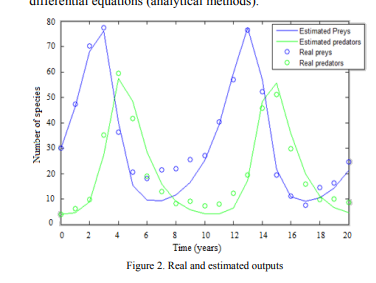

Parámetros ajustados:
alpha = 0.5577, beta = 0.0277, delta = 0.0252, gamma = 0.8111
MSE (Presas): 20.59552235429443
MSE (Depredadores): 14.364553358182347


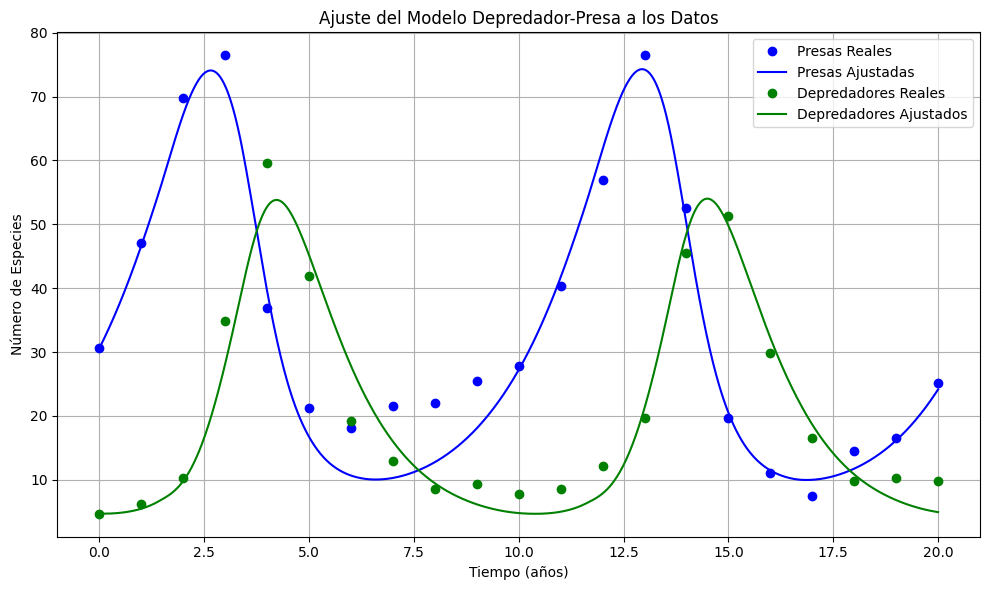

In [27]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Datos reales de presas y depredadores
real_presas = np.array([30.588,47.059,69.804,76.471,36.863,21.176,18.039,21.569,21.961,25.49,27.843,40.392,56.863,76.471,52.549,19.608,10.98,7.451,14.51,16.471,25.098])
real_dep = np.array([4.706,6.275,10.196,34.902,59.608,41.961,19.216,12.941,8.627,9.412,7.843,8.627,12.157,19.608,45.49,51.373,29.804,16.471,9.804,10.196,9.804])
time_years = np.array([i for i in range(len(real_presas))])

# Concatenar los datos reales
datos_concatenados = np.concatenate([real_presas, real_dep])
# Ajustar los parámetros utilizando curve_fit
try:
    popt, pcov = curve_fit(lotka_volterra, time_years, datos_concatenados[:len(time_years) * 2], p0=[0.5, 0.02, 0.01, 0.5])
    alpha_fit, beta_fit, delta_fit, gamma_fit = popt
    print("Parámetros ajustados:")
    print(f"alpha = {alpha_fit:.4f}, beta = {beta_fit:.4f}, delta = {delta_fit:.4f}, gamma = {gamma_fit:.4f}")
except RuntimeError as e:
    print(f"Error durante el ajuste: {e}")

# Soluciones para las presas y depredadores ajustados
t_new, x_fit, y_fit = lotka_volterra_plot(time_years, alpha_fit, beta_fit, delta_fit, gamma_fit)

# Graficar los datos observados y los datos ajustados
plt.figure(figsize=(10, 6))

# Graficar presas
plt.plot(time_years, real_presas, 'bo', label="Presas Reales")
plt.plot(t_new, x_fit, 'b-', label="Presas Ajustadas")

# Graficar depredadores
plt.plot(time_years, real_dep, 'go', label="Depredadores Reales")
plt.plot(t_new, y_fit, 'g-', label="Depredadores Ajustados")

plt.title('Ajuste del Modelo Depredador-Presa a los Datos')
plt.xlabel('Tiempo (años)')
plt.ylabel('Número de Especies')
plt.legend()
plt.grid(True)

# Mostrar la figura
plt.tight_layout()
plt.show()


## Referencias

J. G. Restrepo and C. M. V. Sánchez, "Parameter estimation of a predator-prey model using a genetic algorithm," 2010 IEEE ANDESCON, Bogota, Colombia, 2010, pp. 1-4, doi: 10.1109/ANDESCON.2010.5633365.
keywords: {Biological system modeling;Mathematical model;Data models;Parameter estimation;Predator prey systems;Estimation;Gallium;predator-prey model;parameter estimation;genetic algorithms},